## Labelling GT Categories & Human Text Inputs

In [22]:
import json 
import os
import time
from IPython.display import Image
from IPython.display import clear_output
from collections import defaultdict
from categories import primary_category_BoW, secondary_category_BoW


queue = ['data/textfield_features_OSS.json', 'data/textfield_features_samsung.json']

### Current Category Hierarchy

In [23]:
category_hierarchy = {}

for pcat in primary_category_BoW:
    if pcat not in secondary_category_BoW:
        category_hierarchy[pcat] = []
    else:
        category_hierarchy[pcat] = list(secondary_category_BoW[pcat].keys())
print(json.dumps(category_hierarchy, indent=2))

{
  "search": [
    "tv_show",
    "web",
    "movie",
    "podcast",
    "car_model",
    "country",
    "location",
    "megazine",
    "music",
    "video",
    "manga",
    "news",
    "book",
    "app",
    "iot_device",
    "storage"
  ],
  "code": [
    "card_id",
    "coupon_code"
  ],
  "auth_code": [],
  "label": [],
  "description": [],
  "tag": [],
  "profile": [
    "age",
    "country",
    "country_code",
    "email",
    "name",
    "password",
    "phone",
    "url",
    "username",
    "job",
    "company",
    "department",
    "samsung_account"
  ],
  "datetime": [
    "year",
    "month",
    "hour",
    "minute",
    "second",
    "date",
    "time"
  ],
  "location": [
    "city",
    "country",
    "location"
  ],
  "numerical": [
    "amount",
    "ratio",
    "enum"
  ],
  "ledger": [
    "payee",
    "balance"
  ],
  "device_profile": [
    "model_name",
    "serial_number"
  ],
  "music": [
    "artist",
    "album",
    "song",
    "genre",
    "playlist_ur


# (33/33) data/samsung_internal/Calendar/state_2022-11-01_172842215734.json:note_text


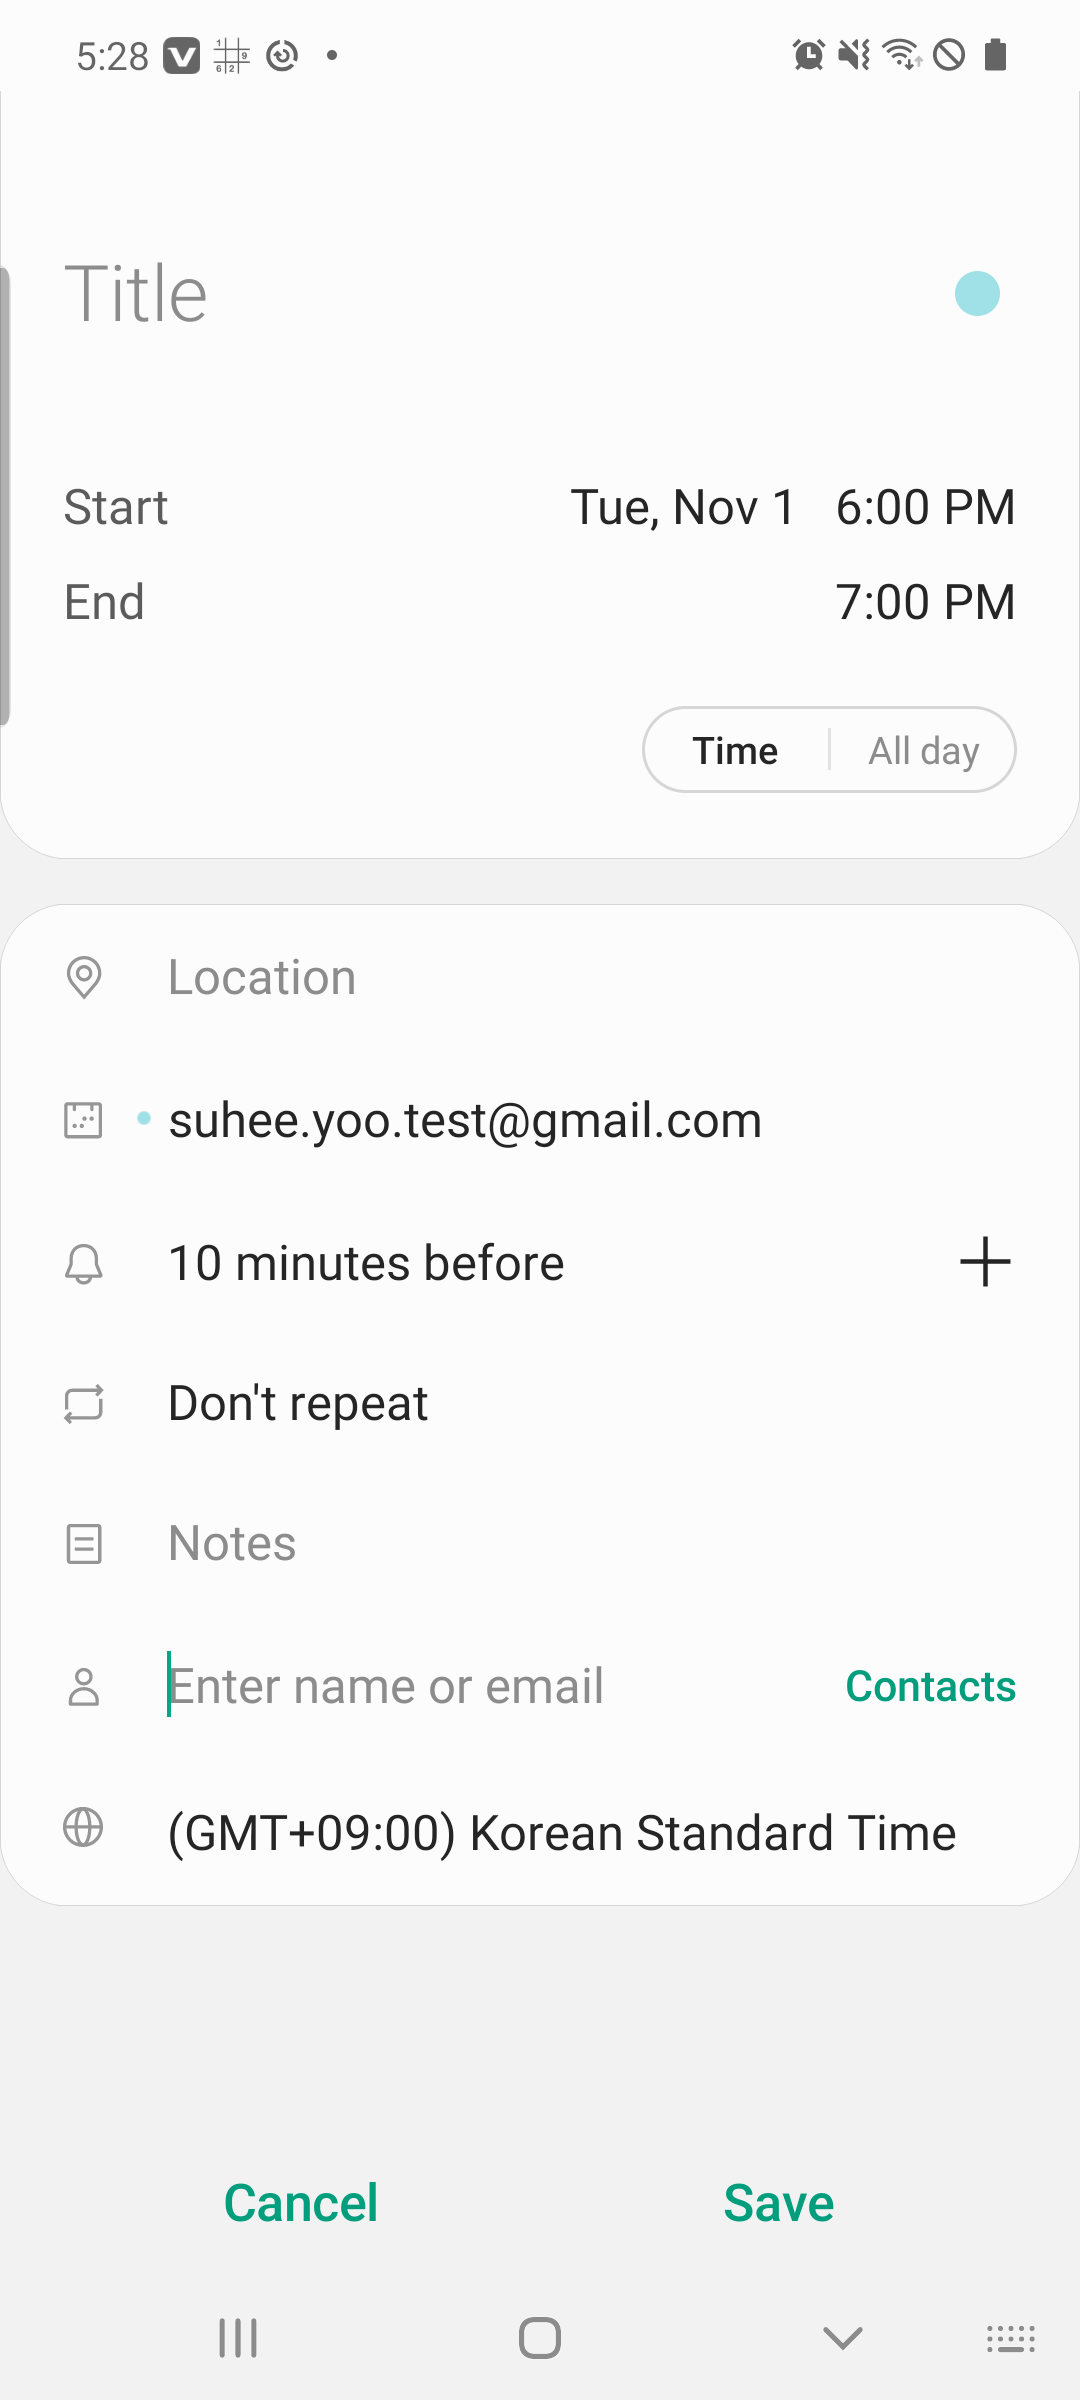

{
  "activity_name": "com.samsung.android.calendar/com.samsung.android.app.calendar.activity.DetailActivity",
  "resource_id": "com.samsung.android.calendar:id/note_text",
  "class": "android.widget.EditText",
  "pointer": "None",
  "content_desc": "None",
  "enabled": "true",
  "visible": "true",
  "checked": "false",
  "selected": "false",
  "editable": "true",
  "clickable": "true",
  "long_clickable": "true",
  "scrollable_horizontal": "false",
  "scrollable_vertical": "false",
  "checkable": "false",
  "text": "Notes",
  "text_hint": "None",
  "bounds": "[167, 1473, 1017, 1610]",
  "rel_bounds": "[167, 1473, 1017, 1610]",
  "uid": "12bd04673b59081e282e5d3620eadc4c",
  "serialize_class": "AndroidViewTree",
  "package_name": "com.samsung.android.calendar",
  "fingerprint": "",
  "type": "textfield",
  "resource-id": "note_text",
  "content-desc": "None"
}
## tokens in the target textfields
['notes', 'note', 'text']
> primary categories? (split by ",")
 (e.g., ['search', 'code', 'aut

In [24]:
if os.path.exists('data/GT/labels.json'):
    with open('data/GT/labels.json') as f:
        labels = json.load(f)
else:
    labels = {}
    
    
for tf_feature_file in queue:
    with open(tf_feature_file) as f:
        tf_features = json.load(f)
        
    for i, (tf_path, tf_info) in enumerate(tf_features.items()):
        if tf_path in labels:
            continue
            
        print(f'\n# ({i+1}/{len(tf_features)})', tf_path)
        display(Image(filename=tf_info['screenshot_path'], width=200))
        time.sleep(0.5)
        
        print(json.dumps(tf_info['textfield_info'], indent=2))
        print('## tokens in the target textfields')
        print(tf_info['textfield_tokens'])
        
        categories = []
        time.sleep(0.5)
        while True:
            primary_categories = input(f'> primary categories? (split by ",")\n (e.g., {list(category_hierarchy.keys())}): ')
            primary_categories = [s.strip() for s in primary_categories.split(',')]
            categories = []
            for pcat in primary_categories:
                if pcat in secondary_category_BoW:
                    scat = input(f'>> secondary categoryies for {pcat}?\n (e.g., {category_hierarchy[pcat]}): ')       
                    categories.append((pcat, [s.strip() for s in scat.split(',')]))
                else:
                    categories.append((pcat, []))
            
            print('## labelled categories')
            print(categories)
            
            ans = input('> confirm? (y/n)')
            if ans == 'y':
                break
        
        input_example = input('> Example of possible text input for this textfield (only one is sufficient): ')
        labels[tf_path] = {
            'GT_categories': categories,
            'sample_text': input_example
        }
        
        with open('data/GT/labels.json', 'w') as f:
            json.dump(labels, f, indent=2)
            
        clear_output(wait=True)
            
        

In [ ]:
## check labelled data 

with open('data/GT/labels.json') as f:
    my_labels = json.load(f)
    
print(json.dumps(my_labels, indent=2))